In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# 1. Load the Dataset
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from semopy import Model

In [2]:
df.columns

NameError: name 'df' is not defined

In [2]:
df = pd.read_csv('Loan Approval Categorical Numerical Synthetic Dataset Continous Outcome.csv')
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
df.head()



,Annual_Income,Credit_Score,Employment_Length,Age,Loan_Term,Loan_Purpose,Employment_Status,Loan_Categories,Region,Marital_Status,Approval_Probability
0,74944.814262,505.502450,14.599966,30,28,Personal,Self-employed,Medium,West,Married,0.656925
1,144085.716769,483.101653,3.690240,44,14,Home,Employed,Small,South,Divorced,0.719795
2,117839.273017,396.884652,6.932794,55,27,Home,Unemployed,Large,South,Single,0.281247
3,101839.018104,633.996669,13.265613,50,1,Personal,Employed,Small,North,Divorced,0.833786
4,48722.236853,562.143288,9.641787,23,28,Car,Self-employed,Small,South,Single,0.449401


In [5]:
numerical_features = ['Annual_Income', 'Credit_Score', 'Employment_Length', 'Age', 'Loan_Term']
categorical_features = ['Loan_Purpose', 'Employment_Status', 'Loan_Categories', 'Region', 'Marital_Status']
target = 'Approval_Probability'
X = df[numerical_features + categorical_features]
y = df[target]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test_original = X_test.copy()  # Preserve the raw test set

In [9]:
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])            # fit on train only
X_train_num = scaler.transform(X_train[numerical_features])
X_test_num  = scaler.transform(X_test[numerical_features])


In [11]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat = encoder.fit_transform(X_train[categorical_features])
X_test_cat  = encoder.transform(X_test[categorical_features])

In [14]:
X_train_transformed = np.hstack([X_train_num, X_train_cat])
X_test_transformed  = np.hstack([X_test_num,  X_test_cat])


In [16]:
feature_names = encoder.get_feature_names_out()
feature = scaler.get_feature_names_out()

In [18]:
feature_name = np.concatenate([feature_names, feature])

In [20]:
feature_name

array(['Loan_Purpose_Car', 'Loan_Purpose_Home', 'Loan_Purpose_Personal',
       'Employment_Status_Employed', 'Employment_Status_Self-employed',
       'Employment_Status_Unemployed', 'Loan_Categories_Large',
       'Loan_Categories_Medium', 'Loan_Categories_Small', 'Region_East',
       'Region_North', 'Region_South', 'Region_West',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Annual_Income', 'Credit_Score',
       'Employment_Length', 'Age', 'Loan_Term'], dtype=object)

In [22]:
mlp = MLPRegressor(
        hidden_layer_sizes=(128, 64),    # Two hidden layers: first with 100 neurons, second with 50 neurons
        activation='relu',               # 'relu' activation function for nonlinear mapping
        solver='adam',                   # 'adam' optimizer for stochastic gradient descent
        alpha=0.001,                     # L2 regularization term to prevent overfitting
        learning_rate='adaptive',        # The learning rate adapts based on performance during training
        learning_rate_init=0.001,        # Initial learning rate used in training# Exponent for the inverse scaling of learning rate (used if solver='sgd')
        max_iter=500,                   # Maximum number of iterations for training
        shuffle=True,                    # Shuffles samples in each iteration to help convergence
        random_state=1,                  # Seed for reproducibility
    )

In [24]:
epochs = 100
training_losses = []
test_losses = []

for epoch in range(epochs):
    mlp.partial_fit(X_train_transformed, y_train)
    
    # Retrieve the training loss from the model.
    train_loss = mlp.loss_
    
    # Compute the test loss using the mean squared error.
    y_test_pred = mlp.predict(X_test_transformed)
    test_loss = mean_squared_error(y_test, y_test_pred)
    
    training_losses.append(train_loss)
    test_losses.append(test_loss)
    
    print(f"Epoch {epoch+1:03d}, Training Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
    


Epoch 001, Training Loss: 0.0271, Test Loss: 0.0107
Epoch 002, Training Loss: 0.0047, Test Loss: 0.0070
Epoch 003, Training Loss: 0.0035, Test Loss: 0.0059
Epoch 004, Training Loss: 0.0030, Test Loss: 0.0054
Epoch 005, Training Loss: 0.0028, Test Loss: 0.0051
Epoch 006, Training Loss: 0.0026, Test Loss: 0.0048
Epoch 007, Training Loss: 0.0024, Test Loss: 0.0047
Epoch 008, Training Loss: 0.0023, Test Loss: 0.0045
Epoch 009, Training Loss: 0.0022, Test Loss: 0.0044
Epoch 010, Training Loss: 0.0021, Test Loss: 0.0044
Epoch 011, Training Loss: 0.0021, Test Loss: 0.0043
Epoch 012, Training Loss: 0.0020, Test Loss: 0.0042
Epoch 013, Training Loss: 0.0020, Test Loss: 0.0042
Epoch 014, Training Loss: 0.0019, Test Loss: 0.0041
Epoch 015, Training Loss: 0.0019, Test Loss: 0.0041
Epoch 016, Training Loss: 0.0019, Test Loss: 0.0041
Epoch 017, Training Loss: 0.0018, Test Loss: 0.0041
Epoch 018, Training Loss: 0.0018, Test Loss: 0.0040
Epoch 019, Training Loss: 0.0018, Test Loss: 0.0040
Epoch 020, T

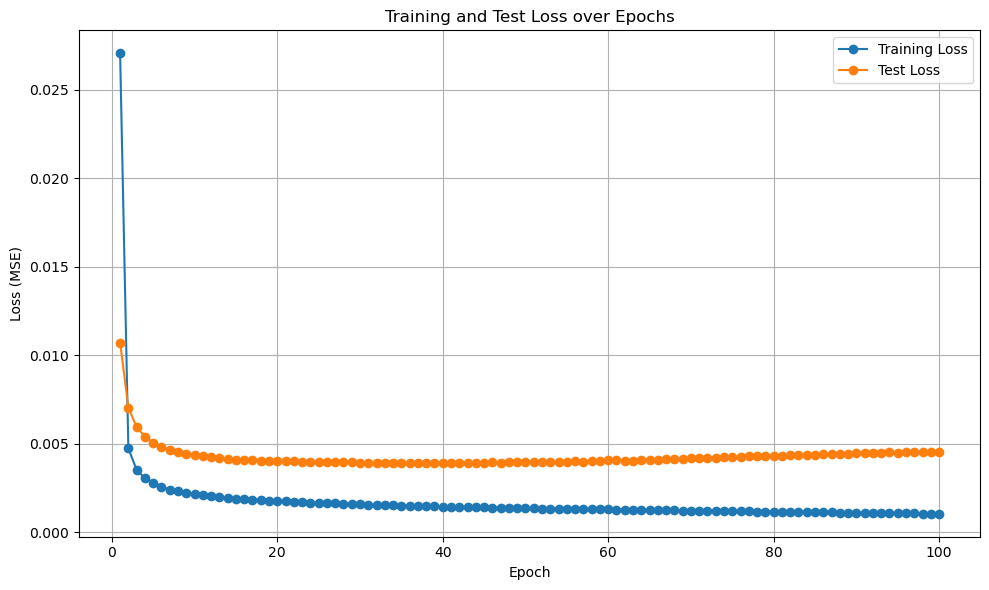

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), training_losses, label='Training Loss', marker='o')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Test Loss over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
y_test_pred = mlp.predict(X_test_transformed)
r2    = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

print("\nFinal Evaluation Metrics on Test Set:")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")


Final Evaluation Metrics on Test Set:
R² Score: 0.8982
MSE: 0.0045
MAE: 0.0534


In [28]:
y_test_pred

array([0.3553474 , 0.87797373, 0.51082706, ..., 0.38721104, 0.21201679,
       0.74980858])

In [30]:
predictions_df = pd.DataFrame({'Predicted_Label': y_test_pred})

In [32]:
predictions_df

,Predicted_Label
0,0.355347
1,0.877974
2,0.510827
3,0.353302
4,0.520570
...,...
1995,0.506198
1996,0.648384
1997,0.387211
1998,0.212017


In [34]:
merged_df = pd.concat([X_test_original.reset_index(drop=True), predictions_df.reset_index(drop=True)], axis=1)

In [36]:
merged_df

,Annual_Income,Credit_Score,Employment_Length,Age,Loan_Term,Loan_Purpose,Employment_Status,Loan_Categories,Region,Marital_Status,Predicted_Label
0,70497.245486,353.290689,19.378970,58,6,Personal,Self-employed,Large,South,Single,0.355347
1,123060.635606,734.158798,3.902116,18,12,Personal,Self-employed,Medium,East,Divorced,0.877974
2,104867.500355,414.860361,19.787100,64,30,Personal,Self-employed,Large,West,Divorced,0.510827
3,34270.827697,743.248106,2.564964,30,10,Personal,Unemployed,Small,North,Married,0.353302
4,99254.049887,818.050800,7.095019,24,18,Car,Unemployed,Medium,South,Divorced,0.520570
...,...,...,...,...,...,...,...,...,...,...,...
1995,132788.638642,689.483428,19.991968,80,21,Personal,Unemployed,Large,South,Married,0.506198
1996,131675.609464,603.585807,19.152190,50,16,Personal,Unemployed,Small,North,Divorced,0.648384
1997,65490.340154,554.791132,15.476016,65,28,Personal,Self-employed,Large,North,Married,0.387211
1998,51183.363841,472.984665,0.199875,34,2,Personal,Unemployed,Large,West,Married,0.212017


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [40]:
numeric_features = ['Annual_Income', 'Credit_Score', 'Employment_Length', 'Age', 'Loan_Term']
categorical_features = ['Loan_Purpose', 'Employment_Status', 'Loan_Categories', 'Region', 'Marital_Status']
target = 'Predicted_Label'  # continuous predictions column in merged_df



In [42]:
def one_way_anova_eta(df, feat, target):
    formula = f"{target} ~ C({feat})"
    model = ols(formula, data=df).fit()
    aov = sm.stats.anova_lm(model, typ=2)
    ss_factor = aov.loc[f"C({feat})", "sum_sq"]
    ss_total = aov["sum_sq"].sum()
    p_val = aov.loc[f"C({feat})", "PR(>F)"]
    eta_sq = ss_factor / ss_total if ss_total > 0 else np.nan
    return p_val, eta_sq

In [44]:
records = []

# Categorical: ANOVA + η²
for feat in categorical_features:
    p_val, eta_sq = one_way_anova_eta(merged_df, feat, target)
    if p_val < 0.05:
        records.append({
            'Feature': feat,
            'Type': 'Categorical',
            'Effect_Size': eta_sq,
            "p_val": p_val
        })

In [46]:
for feat in numeric_features:
    X = sm.add_constant(merged_df[feat])
    y = merged_df[target]
    model = sm.OLS(y, X).fit()
    beta = model.params[feat]
    p_val = model.pvalues[feat]
    # standardized beta = beta * (SD_x / SD_y)
    std_beta = beta * (merged_df[feat].std() / merged_df[target].std())
    if p_val < 0.05:
        records.append({
            'Feature': feat,
            'Type': 'Numeric',
            'p_val': p_val,
            'Effect_Size': abs(std_beta)
        })


In [48]:
eff_df = pd.DataFrame(records)
# eff_df = eff_df.sort_values('Effect_Size', ascending=False).reset_index(drop=True)


In [52]:
eff_df = eff_df.sort_values('Effect_Size', ascending=False).reset_index(drop=True)

In [54]:
eff_df

,Feature,Type,Effect_Size,p_val
0,Annual_Income,Numeric,0.574900,2.570867e-176
1,Credit_Score,Numeric,0.395046,1.092145e-75
2,Employment_Status,Categorical,0.302270,8.349799e-157
3,Loan_Categories,Categorical,0.146864,1.324256e-69
4,Employment_Length,Numeric,0.045388,4.239901e-02
5,Loan_Purpose,Categorical,0.042963,9.063802e-20


In [137]:
# value = eff_df.sort_values('p_value', ascending=False).reset_index(drop=True)

In [56]:
def compute_metrics(GT, R):
    # True Positives, False Positives, False Negatives
    TP = GT & R
    FP = R - GT
    FN = GT - R
    
    # Counts
    tp, fp, fn = len(TP), len(FP), len(FN)
    
    # Metrics
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / len(GT) if len(GT) > 0 else 0
    fdr = fp / (tp + fp) if (tp + fp) > 0 else 0
    
    return {
        'TP': TP, 'FP': FP, 'FN': FN,
        'Precision': precision,
        'Recall': recall,
        'FDR': fdr
    }


GT = {"annual_income", "credit_score","Employment_Status","Loan_Categories","Loan_Purpose"}
R  = {"annual_income", "credit_score","Employment_Status","Loan_Categories","Employment_Length","Loan_Purpose"}

In [58]:
metrics = compute_metrics(GT, R)
print("True Positives (TP):", metrics['TP'])
print("False Positives (FP):", metrics['FP'])
print("False Negatives (FN):", metrics['FN'])
print(f"Precision: {metrics['Precision']:.3f}")
print(f"Recall:    {metrics['Recall']:.3f}")
print(f"FDR:       {metrics['FDR']:.3f}")

True Positives (TP): {'annual_income', 'credit_score', 'Employment_Status', 'Loan_Categories', 'Loan_Purpose'}
False Positives (FP): {'Employment_Length'}
False Negatives (FN): set()
Precision: 0.833
Recall:    1.000
FDR:       0.167


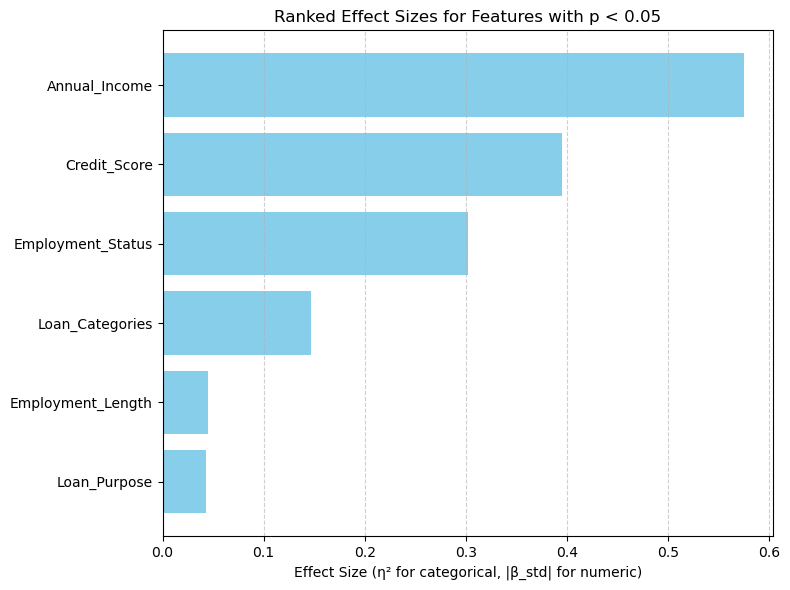

In [67]:
plt.figure(figsize=(8, 6))
plt.barh(eff_df['Feature'], eff_df['Effect_Size'], color='skyblue')
plt.xlabel("Effect Size (η² for categorical, |β_std| for numeric)")
plt.title("Ranked Effect Sizes for Features with p < 0.05")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [52]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

In [54]:
formula = (
    'Predicted_Label ~ Annual_Income + Credit_Score + Employment_Length + Age + Loan_Term'
    ' + C(Loan_Purpose) + C(Employment_Status) + C(Loan_Categories) + C(Region) + C(Marital_Status)'
)

In [56]:
model = smf.ols(formula, data=merged_df).fit()


In [58]:
anova_results = anova_lm(model, typ=2)

In [60]:
anova_results['eta_squared'] = anova_results['sum_sq'] / anova_results['sum_sq'].sum()


In [62]:
anova_results_sorted = anova_results.sort_values('eta_squared')

In [64]:
anova_results_sorted

,sum_sq,df,F,PR(>F),eta_squared
C(Marital_Status),0.002749,2.0,0.784467,4.565045e-01,0.000034
Age,0.011348,1.0,6.476714,1.100487e-02,0.000141
C(Region),0.027201,3.0,5.174948,1.457203e-03,0.000339
Loan_Term,0.082520,1.0,47.098110,8.996041e-12,0.001028
Employment_Length,0.096116,1.0,54.857953,1.906137e-13,0.001197
C(Loan_Purpose),1.759656,2.0,502.161361,3.574598e-177,0.021923
Residual,3.474380,1983.0,NaN,NaN,0.043287
C(Loan_Categories),12.758599,2.0,3640.980900,0.000000e+00,0.158958
Credit_Score,13.281796,1.0,7580.576267,0.000000e+00,0.165477
C(Employment_Status),23.619913,2.0,6740.524878,0.000000e+00,0.294279


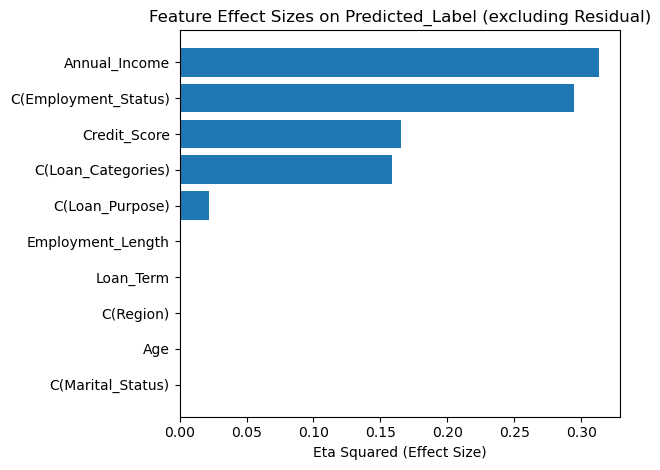

In [72]:

anova_no_resid = anova_results.drop(index='Residual')

# 2. Sort by effect size
anova_no_resid = anova_no_resid.sort_values('eta_squared')

# 3. Plot
import matplotlib.pyplot as plt

plt.figure()
plt.barh(anova_no_resid.index.astype(str), anova_no_resid['eta_squared'])
plt.xlabel('Eta Squared (Effect Size)')
plt.title('Feature Effect Sizes on Predicted_Label (excluding Residual)')
plt.tight_layout()
plt.show()

In [76]:
results_df = anova_results[['PR(>F)', 'eta_squared']].rename(columns={'PR(>F)': 'p_value'})
results_df = results_df.sort_values('eta_squared', ascending=False)


In [78]:
results_df

,p_value,eta_squared
Annual_Income,0.000000e+00,0.313335
C(Employment_Status),0.000000e+00,0.294279
Credit_Score,0.000000e+00,0.165477
C(Loan_Categories),0.000000e+00,0.158958
Residual,NaN,0.043287
C(Loan_Purpose),3.574598e-177,0.021923
Employment_Length,1.906137e-13,0.001197
Loan_Term,8.996041e-12,0.001028
C(Region),1.457203e-03,0.000339
Age,1.100487e-02,0.000141


In [139]:
# # anova_results['eta_squared'] = anova_results['sum_sq'] / anova_results['sum_sq'].sum()
# features      = anova_results.index.astype(str)
# effect_sz     = anova_results['eta_squared'].values
# # significance  = -np.log10(anova_results['PR(>F)'].values)
# anova_sorted = anova_results.sort_values('eta_squared', ascending=False)

# # 4) SHAP‑like summary plot
# plt.figure()
# sc = plt.scatter(
#     effect_sz,
#     np.arange(len(features)),
#     s=80,               # dot size
#     c=anova_sorted['PR(>F)'],     # color by –log10(p)
#     cmap='coolwarm',    # optional: pick any continuous colormap
#     edgecolor='k'
# )
# plt.yticks(np.arange(len(features)), features)
# plt.xlabel('Eta Squared (Effect Size)')
# plt.title('Feature Importance (ANOVA “Beeswarm”)')
# cbar = plt.colorbar(sc)
# cbar.set_label('p‑value')
# plt.tight_layout()
# plt.show()

In [88]:

# Display table
# import ace_tools as tools; tools.display_dataframe_to_user(name="Grouped Feature Effects", dataframe=grouped)

In [36]:
# merged_df.to_csv('Statistical Dataset for Numerical and Binary Features and Continous Outcome.csv', index=False)

In [148]:
from semopy import Model
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [152]:
categorical_cols = ['Loan_Purpose', 'Employment_Status', 'Loan_Categories', 'Region', 'Marital_Status']
df_encoded = pd.get_dummies(merged_df, columns=categorical_cols, drop_first=False)
df_encoded.columns = df_encoded.columns.str.replace("-", "_").str.replace(" ", "_")

In [178]:
nums = ['Annual_Income','Credit_Score','Employment_Length','Age','Loan_Term']
scaler = StandardScaler()
df_encoded[nums] = scaler.fit_transform(df_encoded[nums])

In [154]:
print(merged_df["Region"].unique())

['South' 'East' 'West' 'North']


In [180]:

print(df_encoded.columns.tolist())

['Annual_Income', 'Credit_Score', 'Employment_Length', 'Age', 'Loan_Term', 'Predicted_Label', 'Loan_Purpose_Car', 'Loan_Purpose_Home', 'Loan_Purpose_Personal', 'Employment_Status_Employed', 'Employment_Status_Self_employed', 'Employment_Status_Unemployed', 'Loan_Categories_Large', 'Loan_Categories_Medium', 'Loan_Categories_Small', 'Region_East', 'Region_North', 'Region_South', 'Region_West', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single']


In [182]:
model_desc = """
# Measurement model (latent constructs from categorical dummy variables)
LoanPurpose      =~ Loan_Purpose_Car + Loan_Purpose_Home + Loan_Purpose_Personal
EmploymentStatus =~ Employment_Status_Self_employed + Employment_Status_Unemployed + Employment_Status_Employed
LoanCategories   =~ Loan_Categories_Large + Loan_Categories_Medium + Loan_Categories_Small
RegionLatent     =~ Region_South + Region_East + Region_West + Region_North
MaritalStatus    =~ Marital_Status_Divorced + Marital_Status_Married + Marital_Status_Single

# Structural model: all features pointing to Approval_Probability
Predicted_Label ~ Annual_Income + Credit_Score + Employment_Length + Age + Loan_Term + LoanPurpose + EmploymentStatus + LoanCategories + RegionLatent + MaritalStatus
"""



In [184]:
model = Model(model_desc)
model.fit(df_encoded)

SolverResult(fun=17.984225947882216, success=True, n_it=54, x=array([-5.01067843e-01, -4.89094313e-01, -4.96833964e-01, -4.93173017e-01,
       -4.88198075e-01, -5.01764205e-01, -3.14951820e-01, -3.20941511e-01,
       -3.54161972e-01, -4.77835014e-01, -5.12195574e-01,  1.12930756e-01,
        7.90789371e-02, -8.48981976e-03, -2.82044395e-03, -5.60638980e-03,
       -4.65283088e-02,  1.86455556e-01, -1.44598295e-01,  2.92629538e-03,
        2.85610856e-04,  2.19210484e-01, -7.52422529e-03, -1.22438664e-02,
        1.69949796e-01,  0.00000000e+00,  1.69958127e-01,  2.25339624e-01,
        3.19419463e-03,  4.09565487e-04, -4.71615017e-03, -2.43557553e-03,
        2.23438199e-01, -6.35592058e-03, -2.71120148e-03,  2.56955762e-03,
        0.00000000e+00,  1.65312640e-01,  1.65371874e-01,  0.00000000e+00,
        1.66849229e-01,  1.66804643e-01,  2.23115666e-01,  3.44100396e-04,
        0.00000000e+00,  1.66837890e-01,  1.66969568e-01,  8.42729125e-03,
        1.89253663e-01,  1.62323816e-0

In [186]:
std_est = model.inspect(std_est=True)

In [194]:
std_est

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,Loan_Purpose_Car,~,LoanPurpose,1.000000,1.000000,-,-,-
1,Loan_Purpose_Home,~,LoanPurpose,-0.501068,-0.501619,0.035103,-14.274104,0.0
2,Loan_Purpose_Personal,~,LoanPurpose,-0.489094,-0.492617,0.034519,-14.168712,0.0
3,Employment_Status_Self_employed,~,EmploymentStatus,1.000000,1.000000,-,-,-
4,Employment_Status_Unemployed,~,EmploymentStatus,-0.496834,-0.491418,0.023884,-20.801564,0.0
5,Employment_Status_Employed,~,EmploymentStatus,-0.493173,-0.488673,0.023828,-20.697382,0.0
6,Loan_Categories_Large,~,LoanCategories,1.000000,1.000000,-,-,-
7,Loan_Categories_Medium,~,LoanCategories,-0.488198,-0.495192,0.024745,-19.729135,0.0
8,Loan_Categories_Small,~,LoanCategories,-0.501764,-0.505405,0.025026,-20.050014,0.0
9,Region_South,~,RegionLatent,1.000000,1.000000,-,-,-


In [242]:
lhs_col = "lhs" if "lhs" in std_est.columns else "lval"
rhs_col = "rhs" if "rhs" in std_est.columns else "rval"
p_col = "pval" if "pval" in std_est.columns else "p-value"

effect_col = "std_est" if "std_est" in std_est.columns else "Est. Std" 

# Filter: Only regression paths into the output variable
mask = (std_est["op"] == "~") & (std_est[lhs_col] == "Predicted_Label")
results = std_est.loc[mask, [rhs_col, effect_col, p_col]].rename(
    columns={rhs_col: "Feature", effect_col: "EffectSize", p_col: "p_value"}
)

# Rank by absolute effect size
results["abs_effect"] = results["EffectSize"].abs()
results = results.sort_values("abs_effect", ascending=False)

In [244]:
print(results)

              Feature  EffectSize   p_value  abs_effect
16      Annual_Income    0.561513       0.0    0.561513
22   EmploymentStatus    0.434064       0.0    0.434064
17       Credit_Score    0.393195       0.0    0.393195
23     LoanCategories   -0.341295       0.0    0.341295
21        LoanPurpose   -0.109356       0.0    0.109356
18  Employment_Length   -0.042213  0.000036    0.042213
20          Loan_Term   -0.027876  0.006369    0.027876
19                Age   -0.014024  0.169808    0.014024
24       RegionLatent    0.006330  0.537761    0.006330
25      MaritalStatus    0.000671  0.947701    0.000671


In [246]:
# results = pd.DataFrame(data)
results["abs_effect"] = results["EffectSize"].abs()

# Filter features with p-value < 0.05
significant = results[results["p_value"] < 0.05]

# Sort by effect size for a clean visual
significant = significant.sort_values("abs_effect",ascending = True)


In [248]:
significant

,Feature,EffectSize,p_value,abs_effect
20,Loan_Term,-0.027876,0.006369,0.027876
18,Employment_Length,-0.042213,0.000036,0.042213
21,LoanPurpose,-0.109356,0.0,0.109356
23,LoanCategories,-0.341295,0.0,0.341295
17,Credit_Score,0.393195,0.0,0.393195
22,EmploymentStatus,0.434064,0.0,0.434064
16,Annual_Income,0.561513,0.0,0.561513


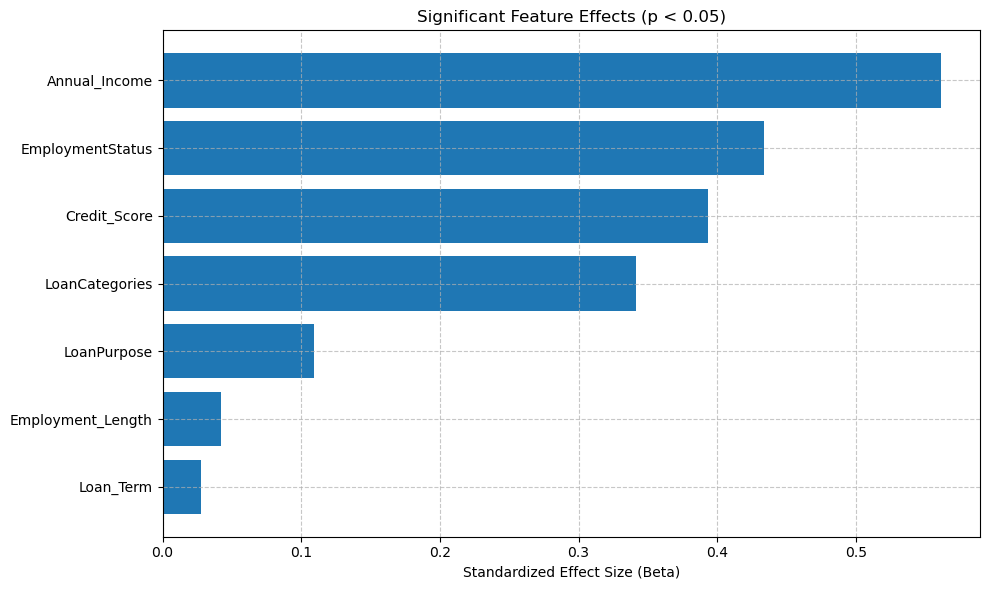

In [250]:
plt.figure(figsize=(10, 6))
plt.barh(significant["Feature"], significant["abs_effect"])
plt.xlabel("Standardized Effect Size (Beta)")
plt.title("Significant Feature Effects (p < 0.05)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [218]:
# plt.figure(figsize=(10, 6))
# plt.barh(results["Feature"], results["abs_effect"], color='cornflowerblue')
# plt.xlabel("Standardized Effect Size (Beta)")
# plt.title("Feature Importance on Loan Approval (SEM)")
# plt.gca().invert_yaxis()
# plt.grid(True, linestyle="--", alpha=0.6)
# plt.tight_layout()
# plt.show()

In [138]:
lhs_col = "lhs"  if "lhs"  in std.columns else "lval"
rhs_col = "rhs"  if "rhs"  in std.columns else "rval"
beta_col = "std_est" if "std_est" in std.columns else "Est. Std"

# Keep only regression paths INTO the DV ------------------------------------
mask = (std["op"] == "~") & (std[lhs_col] == dv)

betas = (std.loc[mask, [rhs_col, beta_col]]
            .rename(columns={rhs_col: "predictor", beta_col: "beta"})
            .set_index("predictor"))

betas["abs_beta"] = betas["beta"].abs()
ranked = betas.sort_values("abs_beta", ascending=False)

print("\n=== Ranked (absolute) standardised effects ===")
print(ranked)


=== Ranked (absolute) standardised effects ===
                       beta  abs_beta
predictor                            
Annual_Income      0.571240  0.571240
EmploymentStatus   0.558989  0.558989
Credit_Score       0.390153  0.390153
LoanCategory      -0.375643  0.375643
LoanPurpose        0.161078  0.161078
Employment_Length -0.044649  0.044649
Loan_Term         -0.036296  0.036296
Age               -0.015613  0.015613
MaritalStatus     -0.005036  0.005036
RegionLatent       0.003051  0.003051


In [140]:

std["p_numeric"] = pd.to_numeric(std[p_col], errors="coerce")

In [142]:
results = (std.loc[mask, [rhs_col, beta_col, "p_numeric"]]
             .rename(columns={rhs_col: "Predictor",
                              beta_col: "Beta (standardised)",
                              "p_numeric": "p‑value"})
             .set_index("Predictor")
             .sort_values("p‑value"))

print("\n=== Standardised β and p‑values for all IV → DV paths ===")
print(results)


=== Standardised β and p‑values for all IV → DV paths ===
                   Beta (standardised)   p‑value
Predictor                                       
Annual_Income                 0.571240  0.000000
Credit_Score                  0.390153  0.000000
Employment_Length            -0.044649  0.000000
Loan_Term                    -0.036296  0.000000
LoanPurpose                   0.161078  0.000000
EmploymentStatus              0.558989  0.000000
LoanCategory                 -0.375643  0.000000
Age                          -0.015613  0.000056
MaritalStatus                -0.005036  0.211411
RegionLatent                  0.003051  0.435810


In [252]:
def compute_metrics(GT, R):
    # True Positives, False Positives, False Negatives
    TP = GT & R
    FP = R - GT
    FN = GT - R
    
    # Counts
    tp, fp, fn = len(TP), len(FP), len(FN)
    
    # Metrics
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / len(GT) if len(GT) > 0 else 0
    fdr = fp / (tp + fp) if (tp + fp) > 0 else 0
    
    return {
        'TP': TP, 'FP': FP, 'FN': FN,
        'Precision': precision,
        'Recall': recall,
        'FDR': fdr
    }


GT = {"annual_income", "credit_score","Employment_Status","Loan_Categories","Loan_Purpose"}
R  = {"annual_income",
        "Employment_Status",
        "credit_score",
        "Loan_Categories",
        "Loan_Purpose",
        "Loan_Term",
        "Age"}

In [254]:
metrics = compute_metrics(GT, R)

In [256]:
print("True Positives (TP):", metrics['TP'])
print("False Positives (FP):", metrics['FP'])
print("False Negatives (FN):", metrics['FN'])
print(f"Precision: {metrics['Precision']:.3f}")
print(f"Recall:    {metrics['Recall']:.3f}")
print(f"FDR:       {metrics['FDR']:.3f}")

True Positives (TP): {'annual_income', 'Employment_Status', 'Loan_Purpose', 'credit_score', 'Loan_Categories'}
False Positives (FP): {'Age', 'Loan_Term'}
False Negatives (FN): set()
Precision: 0.714
Recall:    1.000
FDR:       0.286


In [26]:
import shap
import numpy as np
import psutil

In [57]:
X_test_df = pd.DataFrame(X_test_transformed, columns=feature_name)

In [75]:
X_test_df.columns

Index(['Loan_Purpose_Car', 'Loan_Purpose_Home', 'Loan_Purpose_Personal',
       'Employment_Status_Employed', 'Employment_Status_Self-employed',
       'Employment_Status_Unemployed', 'Loan_Categories_Large',
       'Loan_Categories_Medium', 'Loan_Categories_Small', 'Region_East',
       'Region_North', 'Region_South', 'Region_West',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Annual_Income', 'Credit_Score',
       'Employment_Length', 'Age', 'Loan_Term'],
      dtype='object')

In [59]:
explainer = shap.Explainer(mlp.predict, X_train_transformed)

In [61]:
shap_list = []
for start in range(0, len(X_test_df), 2000):
    Xb = X_test_df[start:start+2000]
    sv = explainer(Xb).values          # shape = (chunk_size, n_features)
    shap_list.append(sv)
all_shap = np.vstack(shap_list) 

PermutationExplainer explainer: 2001it [00:55, 30.01it/s]                       


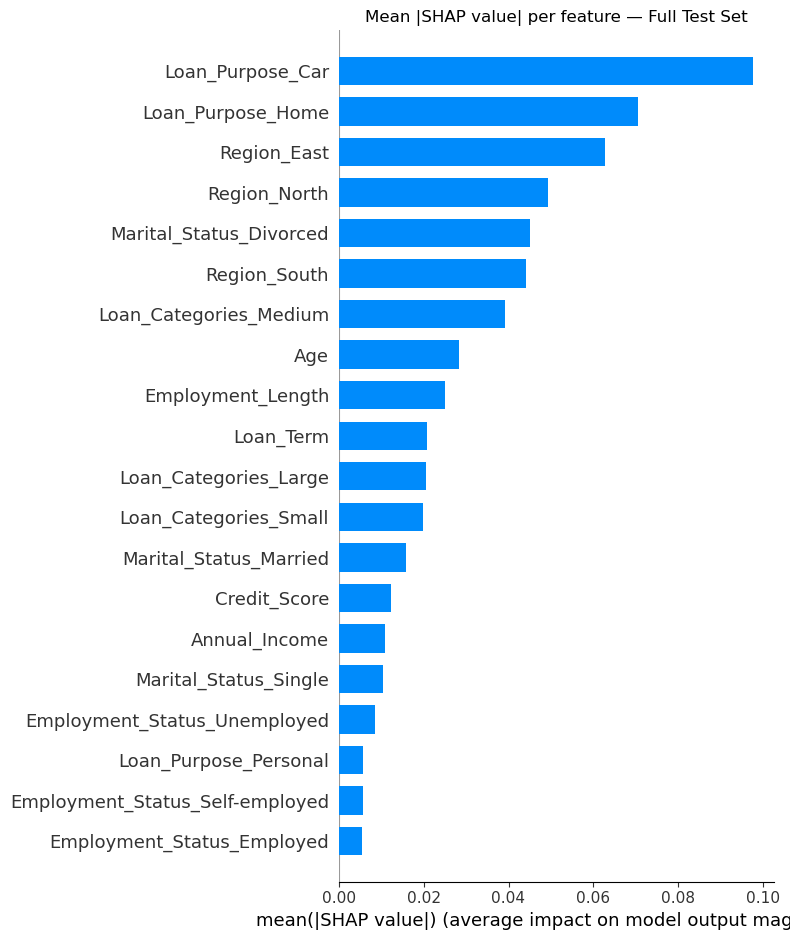

In [65]:
import os
os.makedirs("shap", exist_ok=True)

# 2) Create the figure
plt.figure(figsize=(8,6))


# X_test_df = pd.DataFrame(X_test_df, columns=feature_names)
shap.summary_plot(
    all_shap,
    X_test_df,
    feature_names=feature_name,
    plot_type="bar",   # or omit for the default beeswarm
    show=False         # turn off immediate display
)

plt.title("Mean |SHAP value| per feature — Full Test Set")
plt.tight_layout()

# 5) Save to file (e.g. PNG or JPG)
# out_path = os.path.join("shap", "numerical_regression_test_shap_summary.jpg")
# plt.savefig(out_path, format="png", dpi=300)

# 6) Finally display in notebook
plt.show()

In [87]:
shap_feats = [
    'Loan_Purpose_Car', 'Loan_Purpose_Home', 'Loan_Purpose_Personal',
    'Employment_Status_Employed','Employment_Status_Self-employed',
    'Employment_Status_Unemployed',
    'Loan_Categories_Large','Loan_Categories_Medium','Loan_Categories_Small',
    'Region_East','Region_North','Region_South','Region_West',
    'Marital_Status_Divorced','Marital_Status_Married','Marital_Status_Single',
    'Annual_Income','Credit_Score','Employment_Length','Age','Loan_Term'
]

# 2) The 10 original variables you want:
orig_feats = [
    'Annual_Income', 'Credit_Score', 'Employment_Length', 'Age', 'Loan_Term',
    'Loan_Purpose', 'Employment_Status', 'Loan_Categories', 'Region', 'Marital_Status'
]

# 3) Suppose `all_shap_values` is your array of shape (n_samples, 21).
#    First compute the mean absolute SHAP per encoded feature:
mean_abs_enc = pd.Series(
    np.abs(all_shap).mean(axis=0),
    index=shap_feats
)

# 4) Build a map from each encoded feature → its original parent:
mapping = {}
for f in shap_feats:
    if f in ['Annual_Income','Credit_Score','Employment_Length','Age','Loan_Term']:
        mapping[f] = f
    else:
        # anything before the last underscore is the parent:
        parent = f.rsplit('_',1)[0]
        mapping[f] = parent

# 5) Aggregate by summing all SHAP values for each parent:
mean_abs_orig = mean_abs_enc.groupby(mapping).sum()

# 6) Reindex to your desired order:
mean_abs_orig = mean_abs_orig.reindex(orig_feats)
mean_orig_sorted = mean_abs_orig.sort_values(ascending=False)

In [89]:
mean_orig_sorted

Loan_Purpose         0.173949
Region               0.161095
Loan_Categories      0.079518
Marital_Status       0.071146
Age                  0.028253
Employment_Length    0.024995
Loan_Term            0.020794
Employment_Status    0.019506
Credit_Score         0.012271
Annual_Income        0.010858
dtype: float64

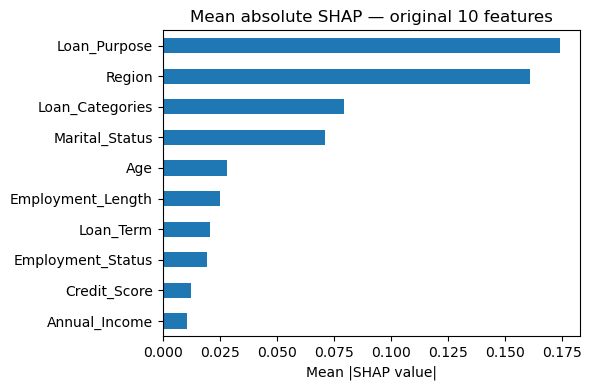

In [108]:
import os
# os.makedirs("shap", exist_ok=True)
# plt.figure(figsize=(6,4))
# mean_orig_sorted.sort_values(ascending=True).plot.barh()
# plt.xlabel("Mean |SHAP value|")
# plt.title("Mean absolute SHAP — original 10 features")
# plt.tight_layout()
# out_path = os.path.join("numerical categorical_regression_test_shap_summary.jpg")
# plt.savefig(out_path, format="jpg", dpi=300)
# plt.show()

os.makedirs("shap", exist_ok=True)
plt.figure(figsize=(6,4))
mean_orig_sorted.plot.barh()
plt.xlabel("mean(|SHAP value|)")
plt.title("Mean absolute SHAP — original features")
plt.gca().invert_yaxis()
plt.tight_layout()
out_path = os.path.join("shap", "numerical categorical_classification_test_shap_summary.jpg")
plt.savefig(out_path, format="jpg", dpi=300)
plt.show()

In [93]:
def compute_metrics(GT, R):
    # True Positives, False Positives, False Negatives
    TP = GT & R
    FP = R - GT
    FN = GT - R
    
    # Counts
    tp, fp, fn = len(TP), len(FP), len(FN)
    
    # Metrics
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / len(GT) if len(GT) > 0 else 0
    fdr = fp / (tp + fp) if (tp + fp) > 0 else 0
    
    return {
        'TP': TP, 'FP': FP, 'FN': FN,
        'Precision': precision,
        'Recall': recall,
        'FDR': fdr
    }


GT = {"annual_income", "credit_score","Employment_Status","Loan_Categories","Loan_Purpose"}
R  = {"Loan_Purpose",
        "Region",
        "credit_score",
        "Loan_Categories",
        "Marital_Status",
        "Age",
        "Employment_Length",
     "Loan_Term",
    "Employment_Status",
    "Credit_Score",
     "Annual_Income"}

In [95]:
metrics = compute_metrics(GT, R)

In [97]:

print("True Positives (TP):", metrics['TP'])
print("False Positives (FP):", metrics['FP'])
print("False Negatives (FN):", metrics['FN'])
print(f"Precision: {metrics['Precision']:.3f}")
print(f"Recall:    {metrics['Recall']:.3f}")
print(f"FDR:       {metrics['FDR']:.3f}")

True Positives (TP): {'Loan_Categories', 'Loan_Purpose', 'Employment_Status', 'credit_score'}
False Positives (FP): {'Annual_Income', 'Loan_Term', 'Region', 'Age', 'Marital_Status', 'Employment_Length', 'Credit_Score'}
False Negatives (FN): {'annual_income'}
Precision: 0.364
Recall:    0.800
FDR:       0.636
